In [ ]:
import pandas as pd
import numpy as np
import csv
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_csv("/content/title.basics.csv") #reading the csv file
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [ ]:
df.sample(20)#picking a sample to get the general information of the data

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
21558,tt1885265,Good Deeds,Good Deeds,2012,110.0,"Comedy,Drama,Romance"
102150,tt5973658,Winter Ridge,Winter Ridge,2018,86.0,Thriller
102684,tt6010972,Electricity,Electricity,2018,NaN,"Drama,Romance"
28511,tt2103184,"Nowhere, U.S.A.","Nowhere, U.S.A.",2017,NaN,Documentary
120315,tt7240764,The Fishermen,The Fishermen,2017,15.0,"Documentary,Drama"
74137,tt4226358,"Baie de Fundy, les plus hautes marées du monde","Baie de Fundy, les plus hautes marées du monde",2014,NaN,Documentary
97358,tt5680640,The Lost Reflection: Confessions of a Kept Woman,Poteryannoe otrazhenie. Ispoved soderzhanka,2016,106.0,"Documentary,Drama"
14898,tt1726869,"Se hai una montagna di neve, tienila all'ombra","Se hai una montagna di neve, tienila all'ombra",2010,86.0,Documentary
39571,tt2407478,The Surfing Messiah,The Surfing Messiah,2012,48.0,"Adventure,Biography,Documentary"
145320,tt9800694,Meteler,Meteler,2019,95.0,"Action,War"


In [ ]:
df.shape #checking number of columns and rows

(146144, 6)

In [ ]:
df.columns #checking the column names

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [ ]:
df.info() #getting overall information on the raw data e.g missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [ ]:
df.describe() # checking the descriptive statistics of the raw data

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [ ]:
missing_values=df.isna().sum() #checking the actual number of missing values per column
missing_values

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [ ]:
average_missing=df.isna().mean() #checking the percentage of missing values per column to determine whether to drop or otherwise
missing_percentage=average_missing *100
missing_percentage

tconst              0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

In [ ]:
column_with_missing = 'runtime_minutes' #replacing missing values in runtime_minutes with mean

In [ ]:
mean_value = df[column_with_missing].mean()

In [ ]:
df[column_with_missing].fillna(mean_value, inplace=True) #replacing missing values in runtime_minutes with mean
df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.000000,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,86.187247,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,86.187247,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.000000,NaN


In [ ]:
missing_values=df.isna().sum()# confirming missing values after replacing runtime_minutes with mean
missing_values

tconst                0
primary_title         0
original_title       21
start_year            0
runtime_minutes       0
genres             5408
dtype: int64

In [ ]:
column_with_missing = 'original_title'#filling in original title names to match primary title names

In [ ]:
adjacent_column = ['primary_title']

In [ ]:
concatenated_values = df[adjacent_column].apply(lambda x: ''.join(x), axis=1)

In [ ]:
df[column_with_missing].fillna(concatenated_values, inplace=True)

In [ ]:
missing_values=df.isna().sum() #confirming that missing values in original title have been filled with title names
missing_values

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes       0
genres             5408
dtype: int64

In [ ]:
df.dropna(inplace=True) #droping rows with missing values on genre column

In [ ]:
missing_values=df.isna().sum() #confirming rows with missing values in the genre column have been dropped
missing_values

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [ ]:
df.duplicated().sum() # no duplicates in the data

0

In [ ]:
df.dtypes #confirmation of data types per column

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

In [ ]:
df['start_year'] = pd.to_datetime(df['start_year'], format='%Y') #converting start_year from integer to datetime

In [ ]:
df.dtypes # checking data type of the data after adjusting start_year data type

tconst                     object
primary_title              object
original_title             object
start_year         datetime64[ns]
runtime_minutes           float64
genres                     object
dtype: object

In [ ]:
df.describe() #checking the data characteristics after adjusting to correct data types

,runtime_minutes
count,140736.000000
mean,86.246782
std,149.933089
min,1.000000
25%,75.000000
50%,86.187247
75%,95.000000
max,51420.000000


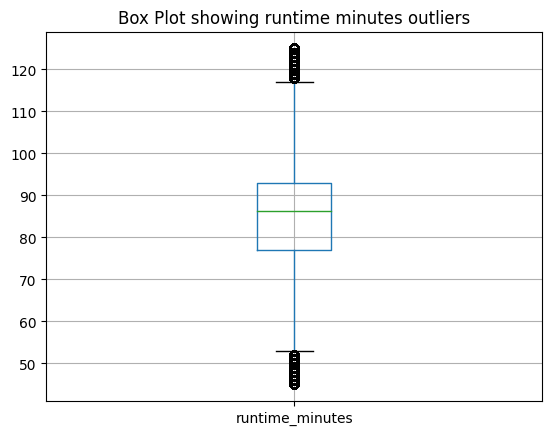

In [ ]:
df.boxplot(column='runtime_minutes') #checking outliers in the data using box plot
plt.title('Box Plot showing runtime minutes outliers')
plt.show()

In [ ]:
Q1 = df['runtime_minutes'].quantile(0.25) #using interquartile method to identify outliers in the data
Q3 = df['runtime_minutes'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
outliers = df[(df['runtime_minutes'] < lower_bound) | (df['runtime_minutes'] > upper_bound)] #list of outliers in the data
outliers

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013-01-01,175.0,"Action,Crime,Drama"
10,tt0146592,Pál Adrienn,Pál Adrienn,2010-01-01,136.0,Drama
12,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013-01-01,180.0,Documentary
15,tt0176694,The Tragedy of Man,Az ember tragédiája,2011-01-01,160.0,"Animation,Drama,History"
24,tt0262218,Akakis mogzauroba,Akakis mogzauroba,2012-01-01,44.0,Documentary
...,...,...,...,...,...,...
146030,tt9900388,Hansa Ek Sanyog,Hansa Ek Sanyog,2019-01-01,135.0,Drama
146095,tt9909086,Pheriaa Come Back,Pheriaa Come Back,2018-01-01,137.0,Drama
146109,tt9911006,Ormma,Ormma,2019-01-01,127.0,Drama
146112,tt9911306,Kalikkoottukar,Kalikkoottukar,2019-01-01,145.0,"Drama,Romance"


In [ ]:
# Dropping the outliers from the DataFrame
df = df.drop(outliers.index)

In [ ]:
df.info() #checking the cleanness of the date after dropping outliers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127913 entries, 1 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   tconst           127913 non-null  object        
 1   primary_title    127913 non-null  object        
 2   original_title   127913 non-null  object        
 3   start_year       127913 non-null  datetime64[ns]
 4   runtime_minutes  127913 non-null  float64       
 5   genres           127913 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 6.8+ MB


In [ ]:
# identifying and incorrect data on start_year column e.g data for 2015, 2025 etc
filtered_df = df[df['start_year'].dt.year > 2022] # Filtering rows with start_year beyond 2022 and dropping them


In [ ]:
df = df.drop(filtered_df.index) #dropping incorrect data

In [ ]:
df.info() #checking data status after the clean up of start_year column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127905 entries, 1 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   tconst           127905 non-null  object        
 1   primary_title    127905 non-null  object        
 2   original_title   127905 non-null  object        
 3   start_year       127905 non-null  datetime64[ns]
 4   runtime_minutes  127905 non-null  float64       
 5   genres           127905 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 6.8+ MB


In [ ]:
df.sample(10) #data sample after clean-up

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
41940,tt2516304,Sequoia,Sequoia,2014-01-01,86.000000,"Comedy,Drama,Romance"
39560,tt2406992,The Human Factor,La variabile umana,2013-01-01,83.000000,Crime
133492,tt8374450,HidingInMyFlat,HidingInMyFlat,2017-01-01,86.187247,Comedy
53668,tt3160230,Angel of the Skies,Angel of the Skies,2013-01-01,98.000000,War
92135,tt5329700,Drowning,Drowning,2016-01-01,75.000000,Drama
19662,tt1838625,Bachelor Days Are Over,Pourquoi tu pleures?,2011-01-01,99.000000,Comedy
145839,tt9876994,Aamako Man,Aamako Man,2018-01-01,60.000000,"Drama,Family"
136138,tt8663942,The Heat: A Kitchen (R)evolution,The Heat: A Kitchen (R)evolution,2018-01-01,75.000000,Documentary
16709,tt1766119,Surface to Air,Surface to Air,2010-01-01,93.000000,Drama
90097,tt5211522,Lavenders Blue,Lavenders Blue,2019-01-01,86.187247,Drama


In [ ]:
df['runtime_minutes'].mean() #checking runtime_minutes mean

84.78284355576233

In [ ]:
df['runtime_minutes'].median() #checking data runtime minutes median

86.18724706088021

In [ ]:
df['runtime_minutes'].std() #checking runtime minutes standard deviation

16.676222531679265

In [ ]:
df['runtime_minutes'].min()#checking minimum runtime minutes

45.0

In [ ]:
df['runtime_minutes'].max()#checking maximum runtime minutes

125.0

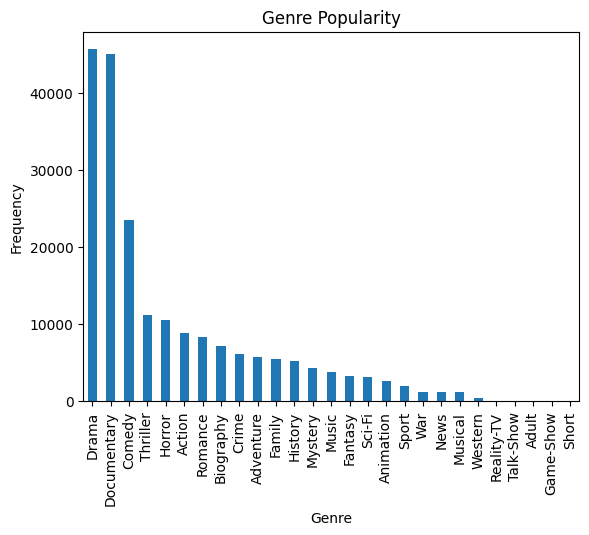

In [ ]:
genres_split = df['genres'].dropna().str.split(',') #creating a function to obtain genre frequency


all_genres = []

# Iterating over each row in the genres_split column
for genre_list in genres_split:
    all_genres.extend(genre_list)

# Creating a pandas Series from the list of genres
genres_series = pd.Series(all_genres)

# Calculating the frequency of each genre
genre_counts = genres_series.value_counts()

# generating a bar plot
genre_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Genre Popularity')

# Displaying the bar plot
plt.show()





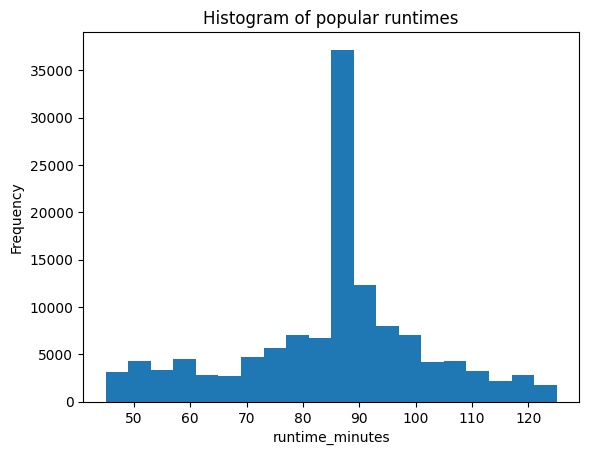

In [ ]:
#creating a histogram of Run Time frequency
column_name = 'runtime_minutes'

plt.hist(df['runtime_minutes'], bins=20)

# Adding labels and title
plt.xlabel('runtime_minutes')
plt.ylabel('Frequency')
plt.title('Histogram of popular runtimes')

# Displaying the histogram
plt.show()

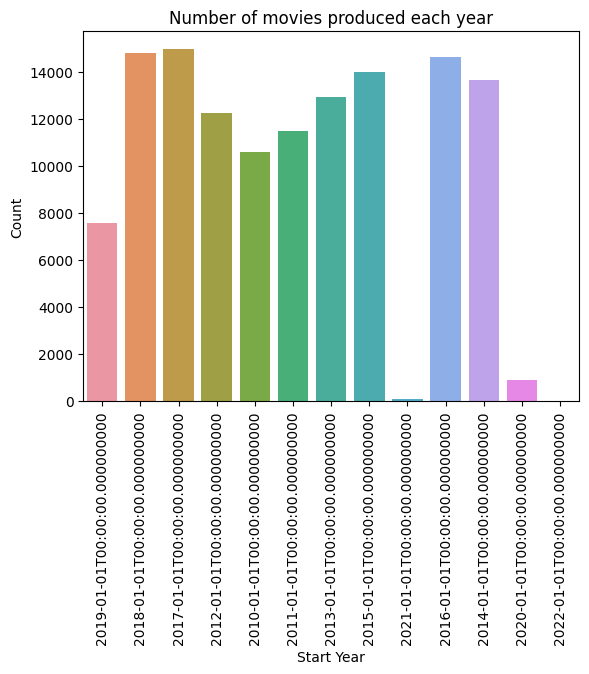

In [ ]:
df['start_year'] = pd.to_datetime(df['start_year'])
# Creating a countplot
sns.countplot(data=df, x='start_year')
# Adding labels and title
plt.xlabel('Start Year')
plt.ylabel('Count')
plt.title('Number of movies produced each year')
plt.xticks(rotation=90)

plt.show()







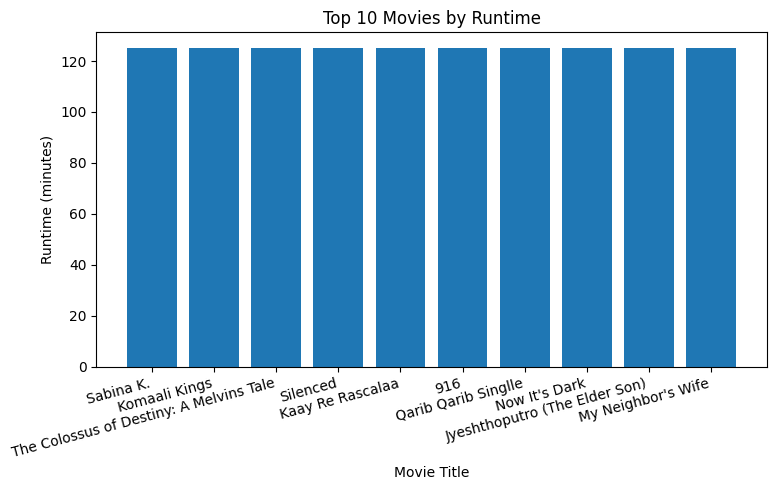

In [ ]:
# Sorting the DataFrame by runtime in descending order
df_sorted = df.sort_values(by='runtime_minutes', ascending=False)
# selecting the number of movies to be dsplayed
top_n = 10
top_movies = df_sorted.head(top_n)

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(top_movies['primary_title'], top_movies['runtime_minutes'])
plt.xlabel('Movie Title')
plt.ylabel('Runtime (minutes)')
plt.title(f'Top {top_n} Movies by Runtime')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

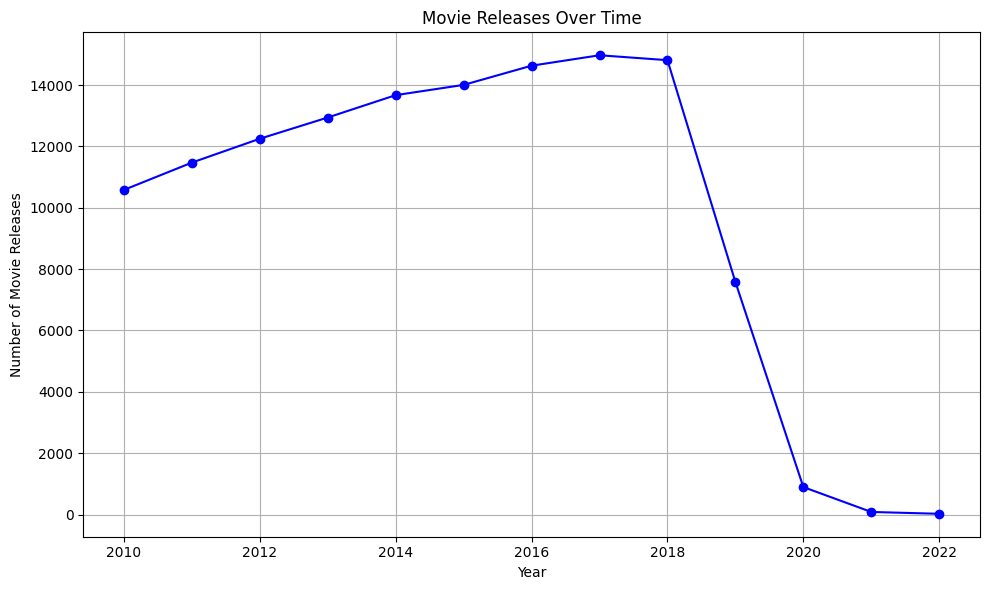

In [ ]:
df['start_year'] = pd.to_datetime(df['start_year'])
# Grouping the data by 'start_year' to count the number of movies released yearly.
movie_count_by_year = df['start_year'].dt.year.value_counts().sort_index()

# Creating a line chart
plt.figure(figsize=(10, 6))
plt.plot(movie_count_by_year.index, movie_count_by_year.values, linestyle='-', marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Movie Releases')
plt.title('Movie Releases Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#language analysis-determining movies that were not translated, have same primary and original titles
total_movies = len(df)
same_titles_movies = df[df['primary_title'] == df['original_title']]
percentage_same_titles = (len(same_titles_movies) / total_movies) * 100

print(f"Percentage of movies with the same primary and original titles: {percentage_same_titles:.2f}%")

Percentage of movies with the same primary and original titles: 89.53%


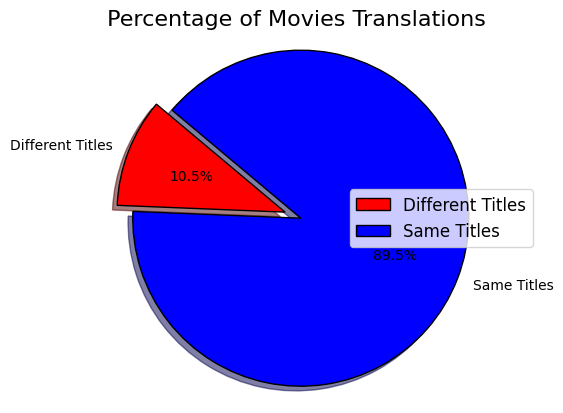

In [ ]:
labels = ['Different Titles', 'Same Titles']
sizes = [100 - percentage_same_titles, percentage_same_titles]
colors = ['red', 'blue']
explode = (0.1, 0)
shadow = True  #exploding the slice different titles
wedgeprops = {'linewidth': 1, 'edgecolor': 'k'}  # Adding a black edge to each wedge

plt.pie(sizes, labels=labels, colors=colors, explode=explode, shadow=shadow, autopct='%1.1f%%',
        startangle=140, wedgeprops=wedgeprops)
plt.axis('equal')  # making the pie chart circular
plt.title(' Percentage of Movies Translations', fontsize=16)
plt.legend(labels, loc='best', fontsize=12)
plt.show()